#### AIRLINE PASSENGER SATISFACTION PREDICTOR

#### We have taken a dataset containing airline passenger survey and some flight related details.
#### Our aim is to find all the features which affect the passenger satisfaction and to train and build a model to predict passenger satisfaction.
#### Target is satisfaction, this is a classification problem, two classes- satisfied and neutral/dissatisfied.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
data = pd.read_excel('satisfaction_2015.xlsx')

In [3]:
# Viewing contents of dataset
data.head(5)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,3,3,3,4,5,3,4,3,0,0.0


In [4]:
# Viewing size of dataset
data.shape

(129880, 24)

#### The dataset contains 129880 rows and 24 columns

In [5]:
# Summary statistics
data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### There are 14 columns which are survey results and other columns are gender, age, flight distance and 
#### , type of travel, customer type, arrival and departure delay.

In [6]:
# Viewing all column details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

#### Here we have 5 columns are object data type, all the rest are integer/float data type.
#### 14 survey result columns and the 5 object data type columns are having categorical values.

In [7]:
# renaming column satisfaction_v2 and satisfaction
data.rename(columns = {'satisfaction_v2':'satisfaction'}, inplace = True)

In [8]:
# changing customer type to returning and first_time_user
data['Customer Type'].replace({'disloyal Customer':'First time user' , 'Loyal Customer': 'Returning'},inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction                       129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

#### satisfaction is our target column.

In [10]:
data.isna().sum()

id                                     0
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [11]:
# df will be used for the preprocessing

### 1. Data Understanding and EDA

### Finding number of unique values in each column and checking their distribution

In [12]:
data['id'].nunique()

129880

#### column 'id' is just like an index , this column can be dropped as it wont affect our target satisfaction. 

In [13]:
data.drop('id', axis=1, inplace=True)

In [14]:
data.shape

(129880, 23)

In [15]:
# understanding target column

In [16]:
data['satisfaction'].nunique()

2

In [17]:
data['satisfaction'].value_counts(normalize=True)*100

neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: satisfaction, dtype: float64

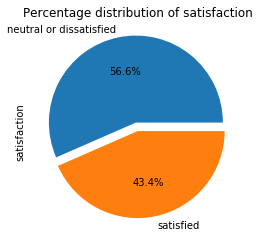

In [18]:
# percentage of distribution of satisfaction

data['satisfaction'].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%')
plt.title('Percentage distribution of satisfaction')
plt.show()

#### Data is non-biased, the target variable has values almost equal percent of values in both the classes 

#### Plotting bargraph of each feature (object/categorical) - to see distribution 

In [19]:
col = ['satisfaction', 'Gender', 'Customer Type', 
       'Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64
neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: satisfaction, dtype: float64


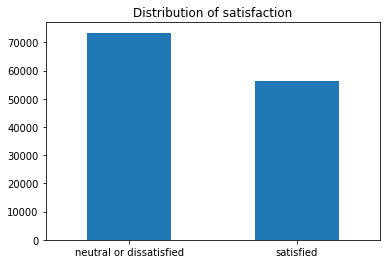

Gender
Female    65899
Male      63981
Name: Gender, dtype: int64
Female    50.738374
Male      49.261626
Name: Gender, dtype: float64


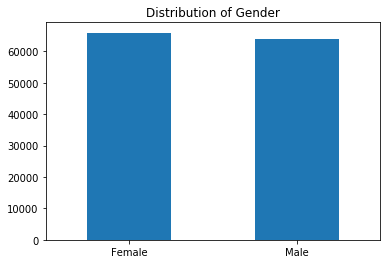

Customer Type
Returning          106100
First time user     23780
Name: Customer Type, dtype: int64
Returning          81.690791
First time user    18.309209
Name: Customer Type, dtype: float64


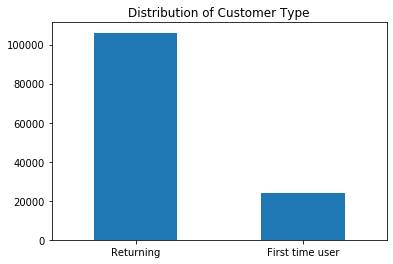

Type of Travel
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
Business travel    69.058362
Personal Travel    30.941638
Name: Type of Travel, dtype: float64


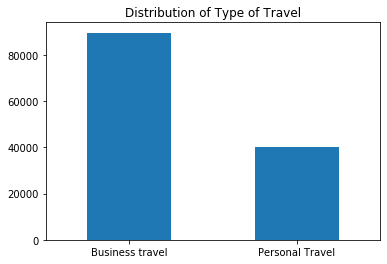

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
Business    47.859563
Eco         44.894518
Eco Plus     7.245919
Name: Class, dtype: float64


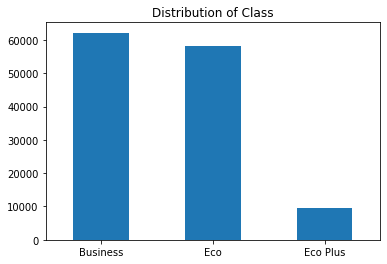

Inflight wifi service
2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: Inflight wifi service, dtype: int64
2    24.884509
3    24.780567
4    19.075300
1    17.191253
5    11.053280
0     3.015091
Name: Inflight wifi service, dtype: float64


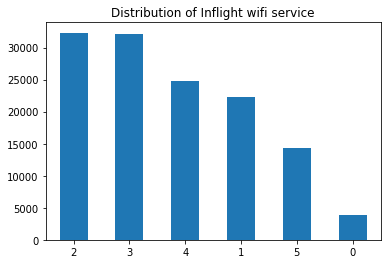

Departure/Arrival time convenient
4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: Departure/Arrival time convenient, dtype: int64
4    24.545735
5    21.556822
3    17.229751
2    16.579920
1    14.943794
0     5.143979
Name: Departure/Arrival time convenient, dtype: float64


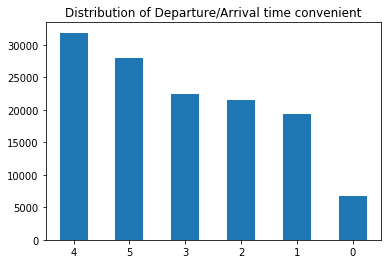

Ease of Online booking
3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: Ease of Online booking, dtype: int64
3    23.400832
2    23.137512
4    18.820450
1    16.850939
5    13.415460
0     4.374808
Name: Ease of Online booking, dtype: float64


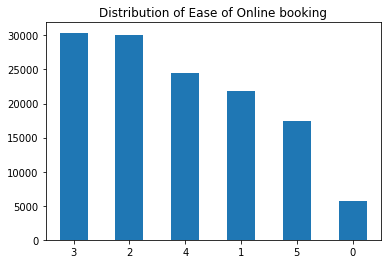

Gate location
3    35717
4    30466
2    24296
1    21991
5    17409
0        1
Name: Gate location, dtype: int64
3    27.500000
4    23.457037
2    18.706498
1    16.931783
5    13.403911
0     0.000770
Name: Gate location, dtype: float64


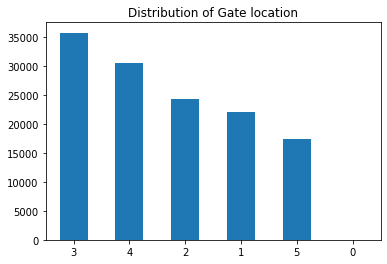

Food and drink
4    30563
5    27957
3    27794
2    27383
1    16051
0      132
Name: Food and drink, dtype: int64
4    23.531722
5    21.525254
3    21.399754
2    21.083308
1    12.358331
0     0.101632
Name: Food and drink, dtype: float64


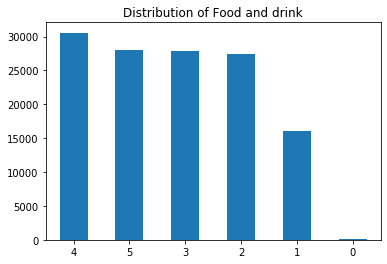

Online boarding
4    38468
3    27117
5    26020
2    21934
1    13261
0     3080
Name: Online boarding, dtype: int64
4    29.618109
3    20.878503
5    20.033877
2    16.887897
1    10.210194
0     2.371420
Name: Online boarding, dtype: float64


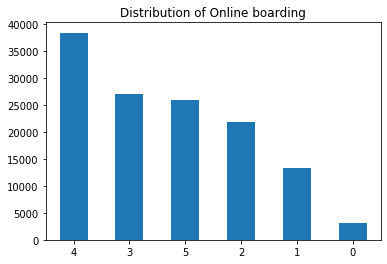

Seat comfort
4    39756
5    33158
3    23328
2    18529
1    15108
0        1
Name: Seat comfort, dtype: int64
4    30.609794
5    25.529720
3    17.961195
2    14.266246
1    11.632276
0     0.000770
Name: Seat comfort, dtype: float64


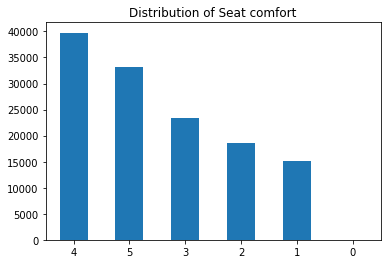

Inflight entertainment
4    36791
5    31544
3    23884
2    21968
1    15675
0       18
Name: Inflight entertainment, dtype: int64
4    28.326917
5    24.287034
3    18.389282
2    16.914075
1    12.068833
0     0.013859
Name: Inflight entertainment, dtype: float64


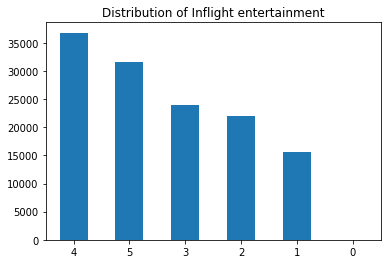

On-board service
4    38703
5    29492
3    28542
2    18351
1    14787
0        5
Name: On-board service, dtype: int64
4    29.799045
5    22.707114
3    21.975670
2    14.129196
1    11.385125
0     0.003850
Name: On-board service, dtype: float64


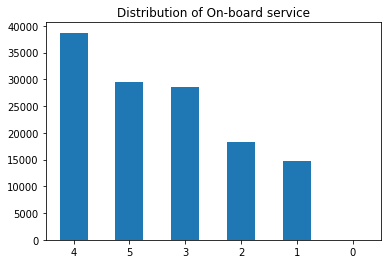

Leg room service
4    35886
5    30905
3    25056
2    24540
1    12895
0      598
Name: Leg room service, dtype: int64
4    27.630120
5    23.795042
3    19.291654
2    18.894364
1     9.928395
0     0.460425
Name: Leg room service, dtype: float64


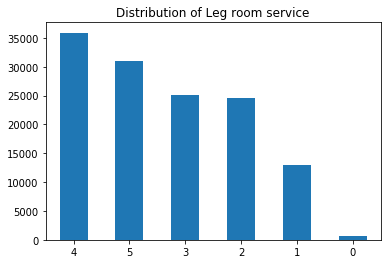

Baggage handling
4    46761
5    33878
3    25851
2    14362
1     9028
Name: Baggage handling, dtype: int64
4    36.003234
5    26.084078
3    19.903757
2    11.057900
1     6.951032
Name: Baggage handling, dtype: float64


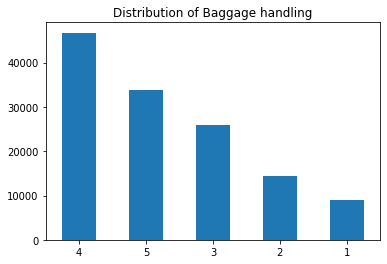

Checkin service
4    36333
3    35453
5    25883
1    16108
2    16102
0        1
Name: Checkin service, dtype: int64
4    27.974284
3    27.296735
5    19.928395
1    12.402217
2    12.397598
0     0.000770
Name: Checkin service, dtype: float64


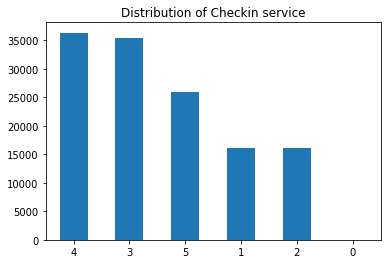

Inflight service
4    47323
5    34066
3    25316
2    14308
1     8862
0        5
Name: Inflight service, dtype: int64
4    36.435941
5    26.228827
3    19.491839
2    11.016323
1     6.823221
0     0.003850
Name: Inflight service, dtype: float64


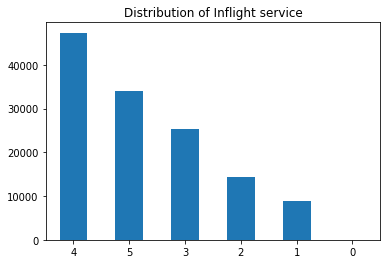

Cleanliness
4    33969
3    30639
5    28416
2    20113
1    16729
0       14
Name: Cleanliness, dtype: int64
4    26.154142
3    23.590237
5    21.878657
2    15.485833
1    12.880351
0     0.010779
Name: Cleanliness, dtype: float64


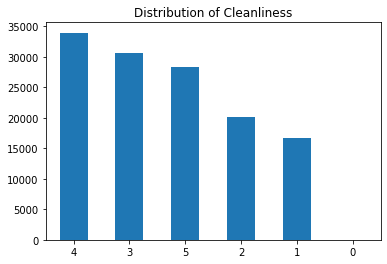

In [20]:
for i in col:
    print(i)
    print(data[i].value_counts())
    print(data[i].value_counts(normalize=True)*100)
    data[i].value_counts().plot.bar()
    plt.title(f'Distribution of {i}')
    plt.xticks(rotation = 0)
    plt.show()

#### Pie plots of survey results

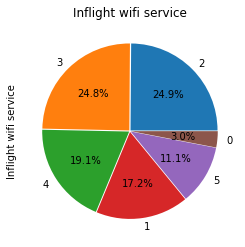

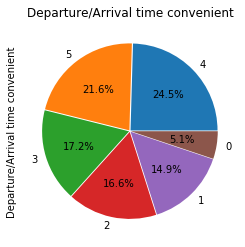

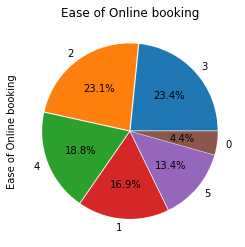

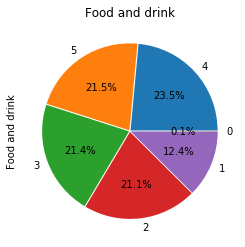

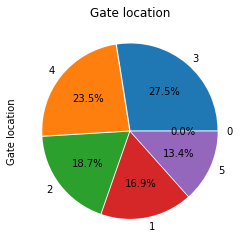

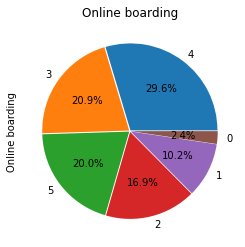

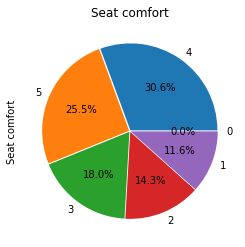

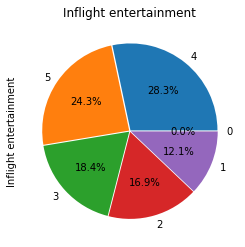

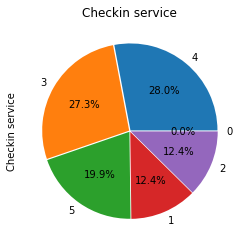

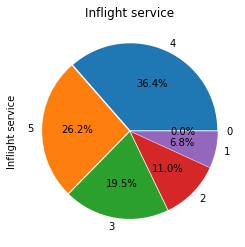

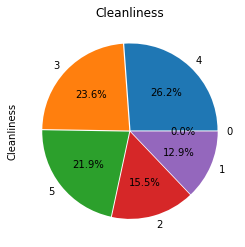

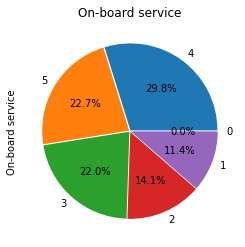

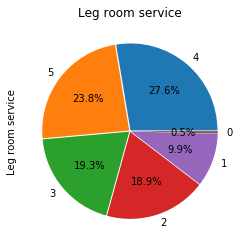

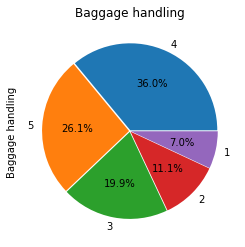

In [21]:
cols = ['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
        'Food and drink','Gate location','Online boarding', 'Seat comfort','Inflight entertainment',
        'Checkin service', 'Inflight service','Cleanliness', 'On-board service', 'Leg room service',]
for col in cols:
    data[col].value_counts().plot.pie(explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01],autopct='%1.1f%%')
    plt.title(col)
    plt.show()
data['Baggage handling'].value_counts().plot.pie(explode=[0.01, 0.01, 0.01, 0.01, 0.01],autopct='%1.1f%%') 
plt.title('Baggage handling')
plt.show()


### Inferences
#### 1.  Satisfaction - target, two classes satisfied and neutral/dissatified(classes have balanced values).
#### 2.  Gender - Female or male, almost same number of female and male.
#### 3. Customer Type - Two types - first time user and returning 
#### 4. Type of Travel - Business travel and personal travel (Majority of passengers had travelled for business purposes.
#### 5. Class - Indicates Flying Class (Business, Eco, Eco Plus) -Majority passengers had travelled in Business class and Eco class. 
#### 6. Survey Results- Many of the survey results contained 0 values, which means passengers had not rated, so we need to remove these rows.
#### Most customers gave low rating for Inflight wifi-service, gate location, and ease of online booking

### Plots to see how the different customer survey ratings and satisfaction are related

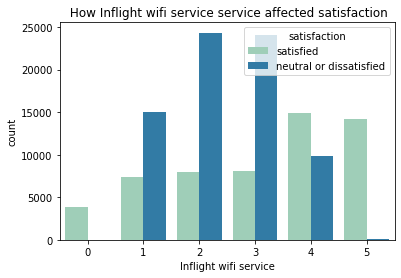

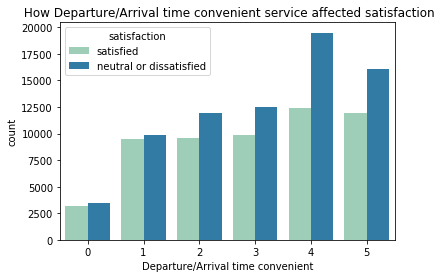

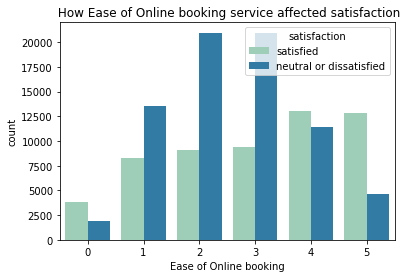

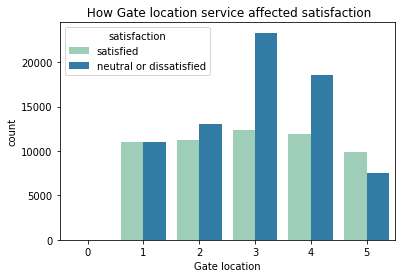

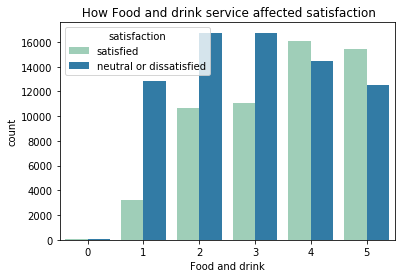

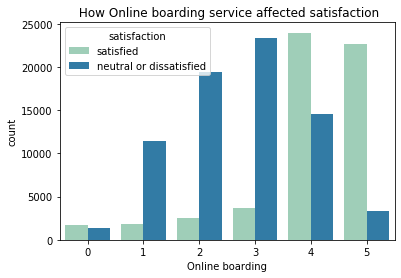

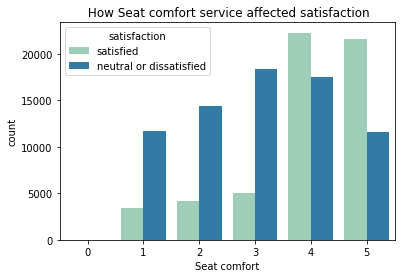

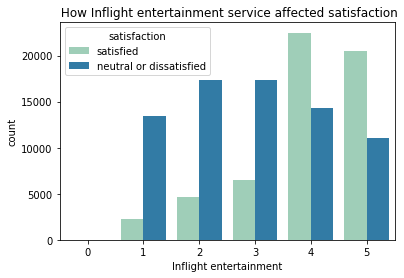

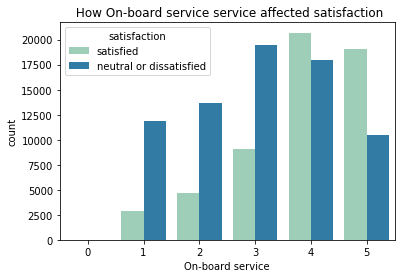

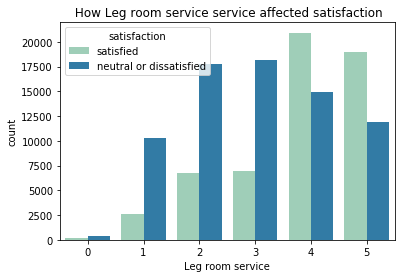

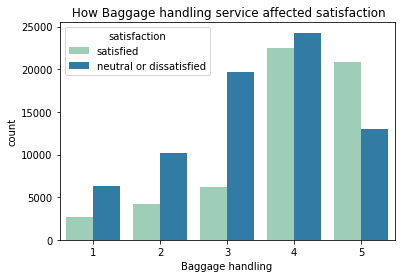

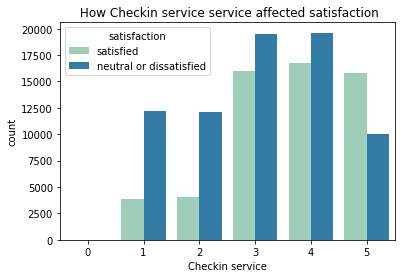

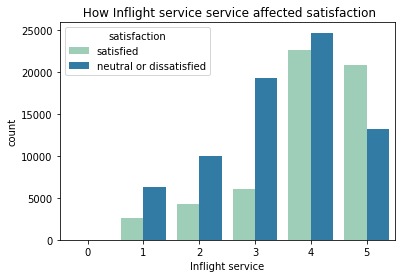

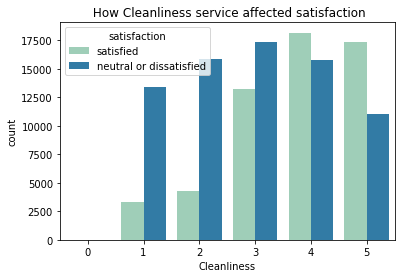

In [22]:
col1 = [ 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for i in col1:
    sns.countplot(x = i, hue = 'satisfaction', palette = "YlGnBu", data = data)
    plt.title(f' How {i} service affected satisfaction')
    plt.show()

#### Studying the above graphs, we have realized that some people who have given 5 or 4 star ratings for departure or arrival time convenience are not really satisfied with the whole service, or they were disappointed with the other services. 

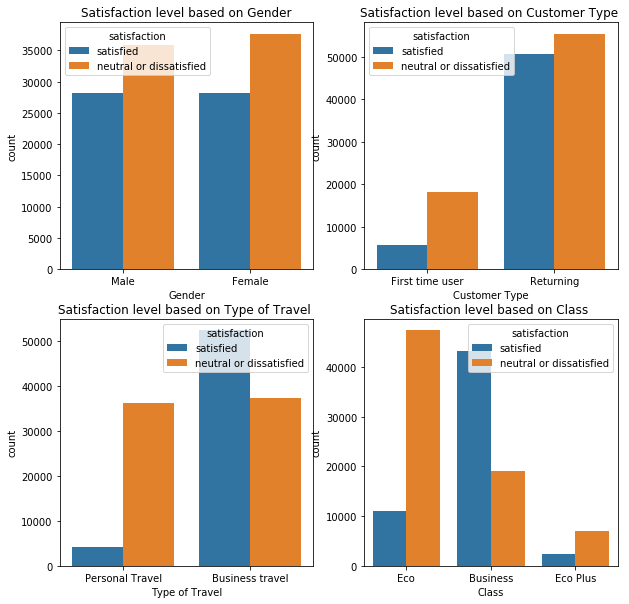

In [23]:
#Plotting the other 
plt.figure(figsize=(10,10))

plt.subplot(221)
sns.countplot(x = 'Gender', hue = 'satisfaction', data = data)
plt.title('Satisfaction level based on Gender')

plt.subplot(222)
sns.countplot(x = 'Customer Type', hue = 'satisfaction',data = data)
plt.title('Satisfaction level based on Customer Type ')

plt.subplot(223)
sns.countplot(x = 'Type of Travel', hue = 'satisfaction',data = data)
plt.title('Satisfaction level based on Type of Travel ')

plt.subplot(224)
sns.countplot(x = 'Class', hue = 'satisfaction',data = data)
plt.title('Satisfaction level based on Class ')
plt.show()

#### From the above graphs, 
#### 1. We can see that Gender does'nt affect satisfaction directly.
#### 2. Customer type - both first time user and returning customers are equally satisfied or dissatisfied 
#### 3. When we consider type of travel - People who have travelled for Business purposes are mostly satisfied and people who have travelled for personal purposes were mostly dissatisfied.
#### 4. When we consider class - people who used business class were the most satisfied and in both eco and eco plus class more people were dissatisfied. 

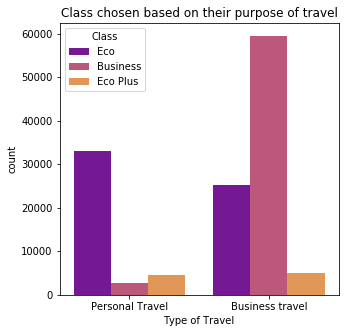

In [24]:
# Flying class based on purpose of travel
plt.figure(figsize=(5,5))
sns.countplot(x=data['Type of Travel'],hue=data['Class'],palette='plasma')
plt.title('Class chosen based on their purpose of travel')
plt.show()

#### People who travelled for business purposes preferred Business class and those who travelled for personal purposes used Eco class

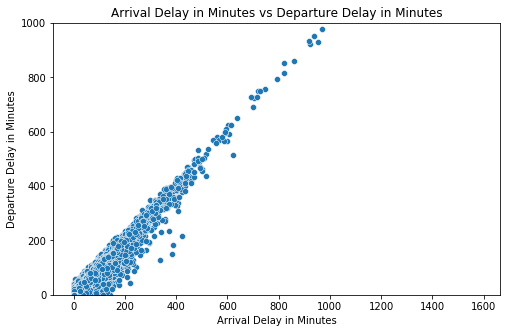

In [25]:
# Arrival Delay vs Departure Delay in Minutes

plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Arrival Delay in Minutes'],y=data['Departure Delay in Minutes'])
plt.title('Arrival Delay in Minutes vs Departure Delay in Minutes')
plt.ylim(0,1000)
plt.show()

#### Almost linear correlation between Arrival and Departure delay.
#### We can see that there is a strong correlation between the features 'Departure delay in minutes' and 'Arrival delay in minutes', if there is a delay in departure it means there is that much time delay in arrival

In [26]:
# function to group age into different classes
def age_class(n):
    if n in range(0, 15):
        return 'Child'
    elif n in range(15, 25):
        return 'Youth'
    elif n in range(25, 65):
        return 'Adult'
    elif n >= 65:
        return 'Senior'

In [27]:
data['Age_class'] = data['Age'].apply(lambda x:age_class(x))

In [28]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Age_class'],
      dtype='object')

In [29]:
data.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Age_class                              0
dtype: int64

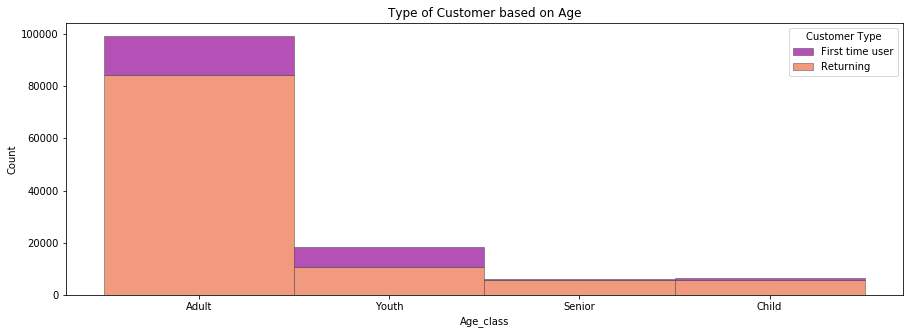

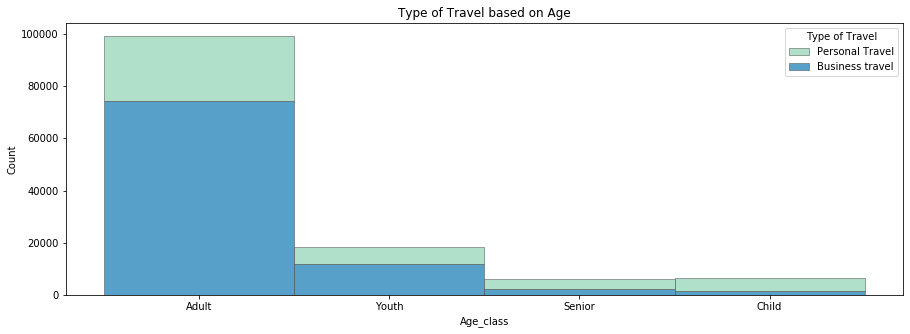

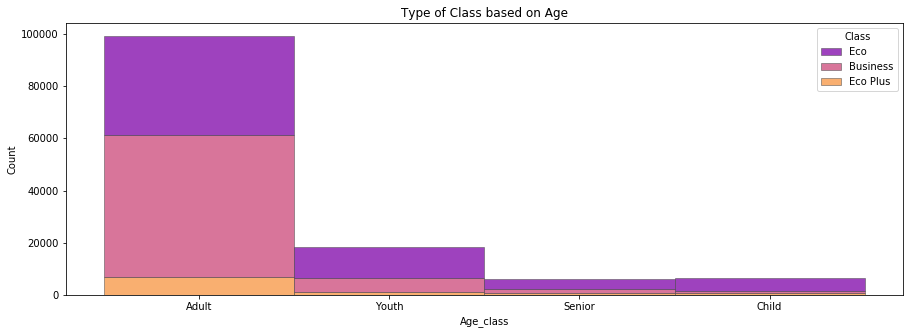

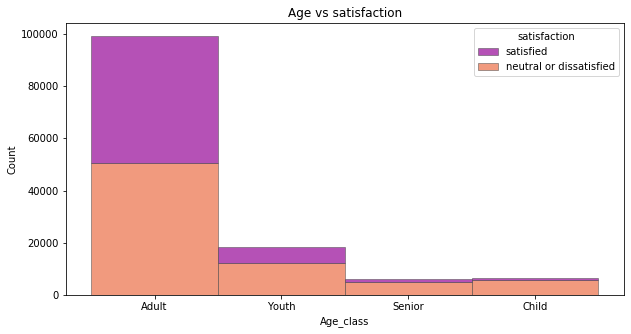

In [30]:
#Type of Customer based on Age

plt.figure(figsize=(15,5))
sns.histplot(x=data['Age_class'],hue=data['Customer Type'],multiple='stack',palette='plasma',edgecolor='0.3',linewidth=0.5)
plt.title('Type of Customer based on Age') 
plt.show()

#Type of Travel based on Age

plt.figure(figsize=(15,5))
sns.histplot(x=data['Age_class'],hue=data['Type of Travel'],multiple='stack',palette='YlGnBu',edgecolor='0.3',linewidth=0.5)
plt.title('Type of Travel based on Age') 
plt.show()

#Type of Class based on Age

plt.figure(figsize=(15,5))
sns.histplot(x=data['Age_class'],hue=data['Class'],multiple='stack',palette='plasma',edgecolor='0.3',linewidth=0.5)
plt.title('Type of Class based on Age') 
plt.show()

#Type of Satisfaction based on Age

plt.figure(figsize=(10,5))
sns.histplot(x=data['Age_class'],hue=data['satisfaction'],multiple='stack',palette='plasma',edgecolor='0.3',linewidth=0.5)
plt.title('Age vs satisfaction') 
plt.show()

#### Most of the passengers are in the age range 25-64 (Adult) and among them most , travelled for business purposes, used business class and are returning customers.

In [31]:
# function to group Flight distance into classes
def flight_distance(n):
    if n <=1000:
        return 'Short Distance'
    elif n >1000:
         return 'Long Distance'

In [32]:
data['Flight_Distance_class'] = data['Flight Distance'].apply(lambda x:flight_distance(x))

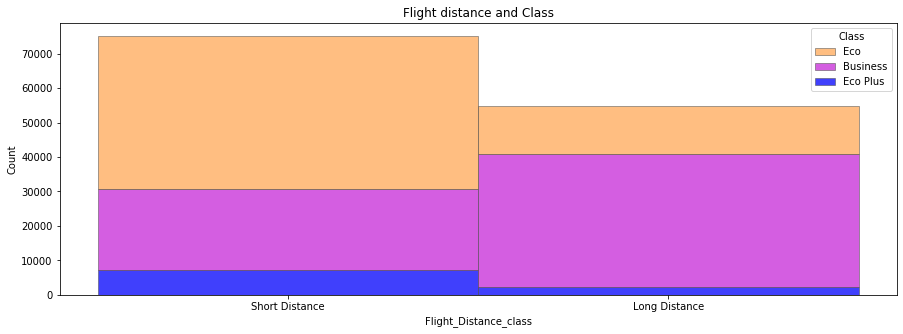

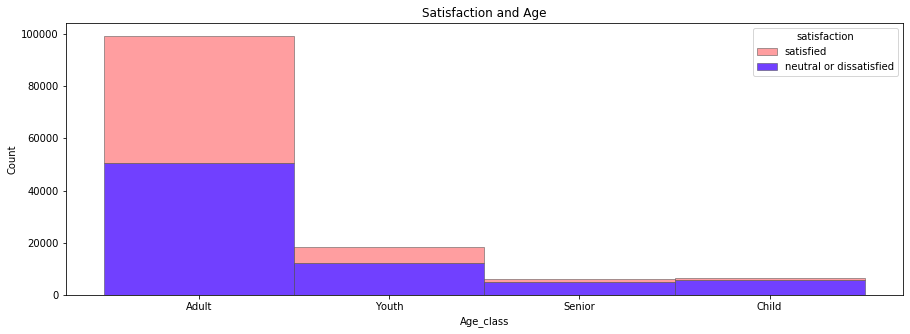

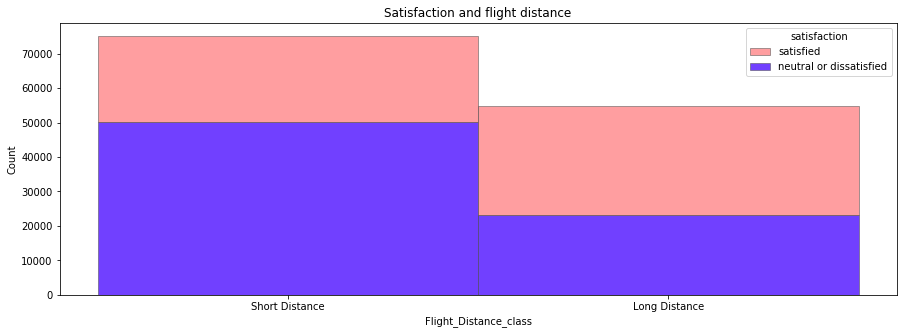

In [33]:
#Type of Class based on Flight Distance

plt.figure(figsize=(15,5))
sns.histplot(x=data['Flight_Distance_class'],hue=data['Class'],multiple='stack',palette='gnuplot2_r',edgecolor='0.3',linewidth=0.5)
plt.title('Flight distance and Class') 
plt.show()

#Satisfaction and Age

plt.figure(figsize=(15,5))
sns.histplot(x=data['Age_class'],hue=data['satisfaction'],multiple='stack',palette='gnuplot2_r',edgecolor='0.3',linewidth=0.5)
plt.title('Satisfaction and Age') 
plt.show()

#Satisfaction and flight distance

plt.figure(figsize=(15,5))
sns.histplot(x=data['Flight_Distance_class'],hue=data['satisfaction'],multiple='stack',palette='gnuplot2_r',edgecolor='0.3',linewidth=0.5)
plt.title('Satisfaction and flight distance') 
plt.show()


#### People taking long distance flights preferred Business class.
#### Age is not a factor for customers to be satisfied or dissatisfied.
#### Mostly users who took short distance flights were dissatisfied. 

In [34]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['satisfaction'] = label_encoder.fit_transform(data['satisfaction'])
data['Age_class'] = label_encoder.fit_transform(data['Age_class'])
data['Flight_Distance_class'] = label_encoder.fit_transform(data['Flight_Distance_class'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

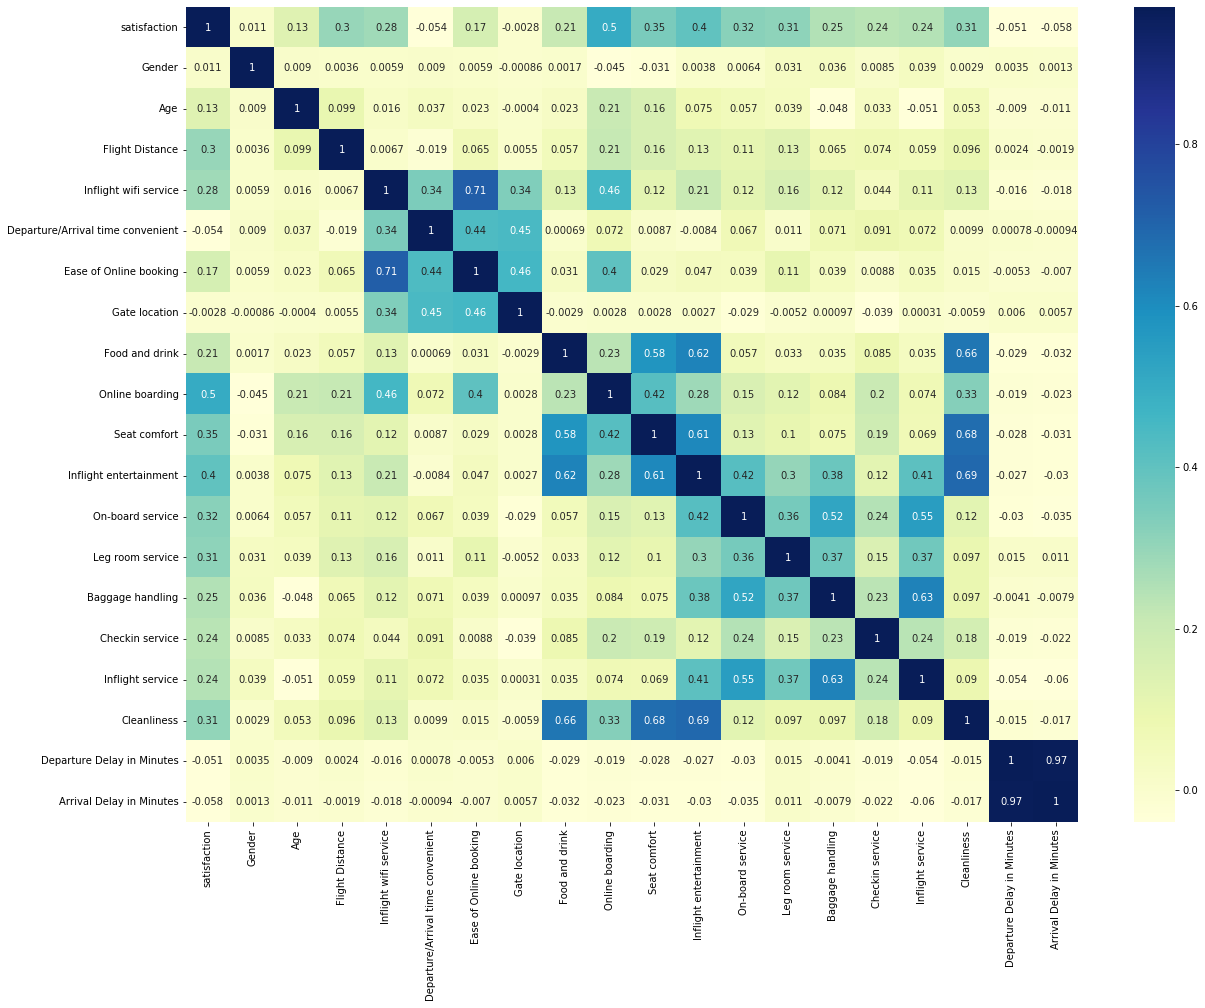

In [35]:
#plotting correlation matrix
data2 = data.drop(['Age_class', 'Flight_Distance_class'], axis=1)
corrmatrix = data2.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corrmatrix, annot=True,vmin=-.04, vmax=0.97, cmap="YlGnBu")
plt.show()

#### From the correlation matrix columns which doesn't affect satisfaction:
#### Age, Departure/Arrival Time convenient,Gate location,Depature/Arrival delay in minutes.

In [36]:
#### Trying out correlations (new classes created for age and flight distance)

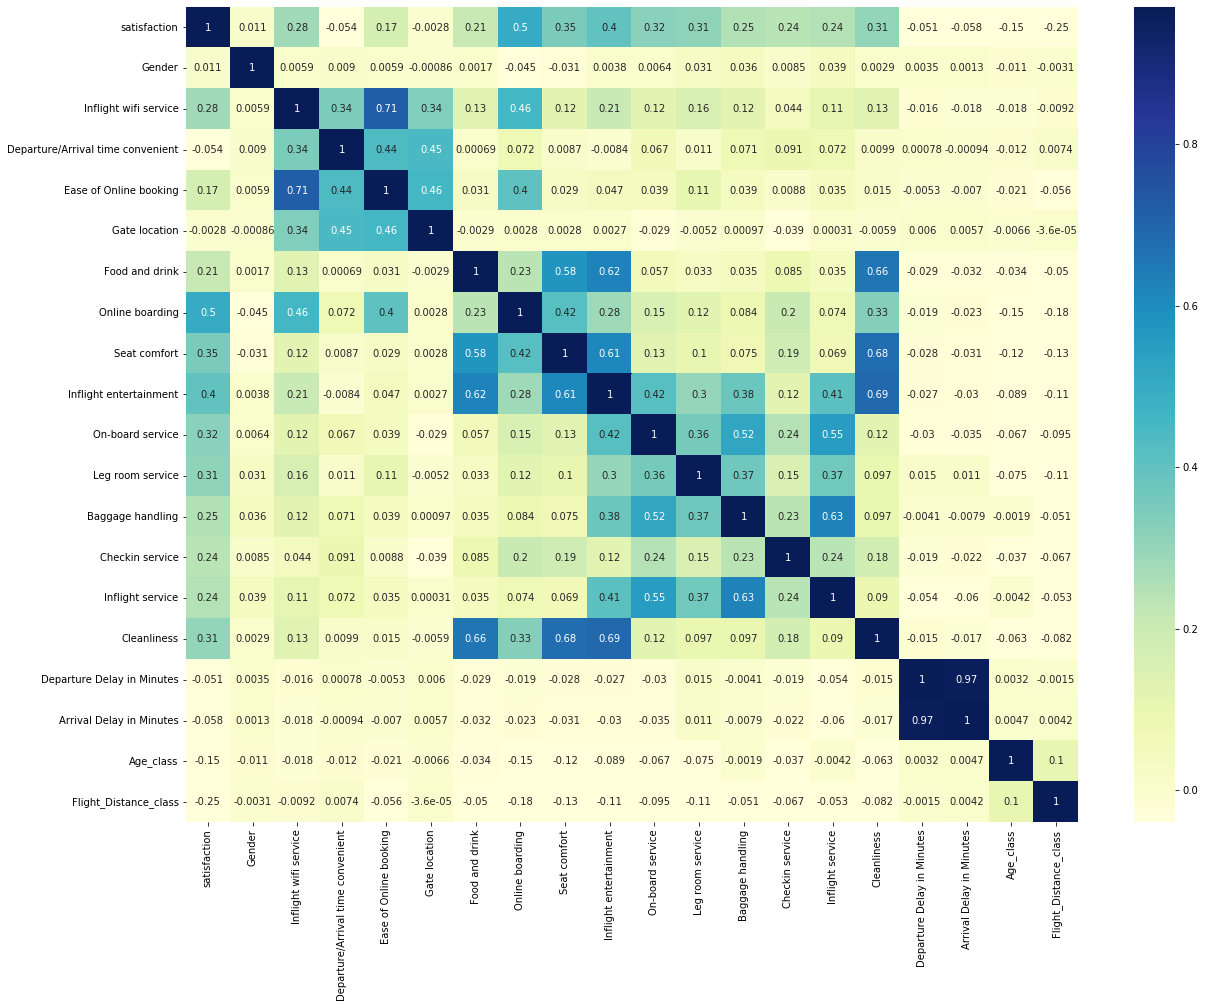

In [37]:
#plotting correlation matrix
data1 = data.drop(['Age', 'Flight Distance'], axis=1)
corrmatrix = data1.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corrmatrix, annot=True,vmin=-.04, vmax=0.97, cmap="YlGnBu")
plt.show()

In [38]:
#plotting correlation matrix with age class and flight class

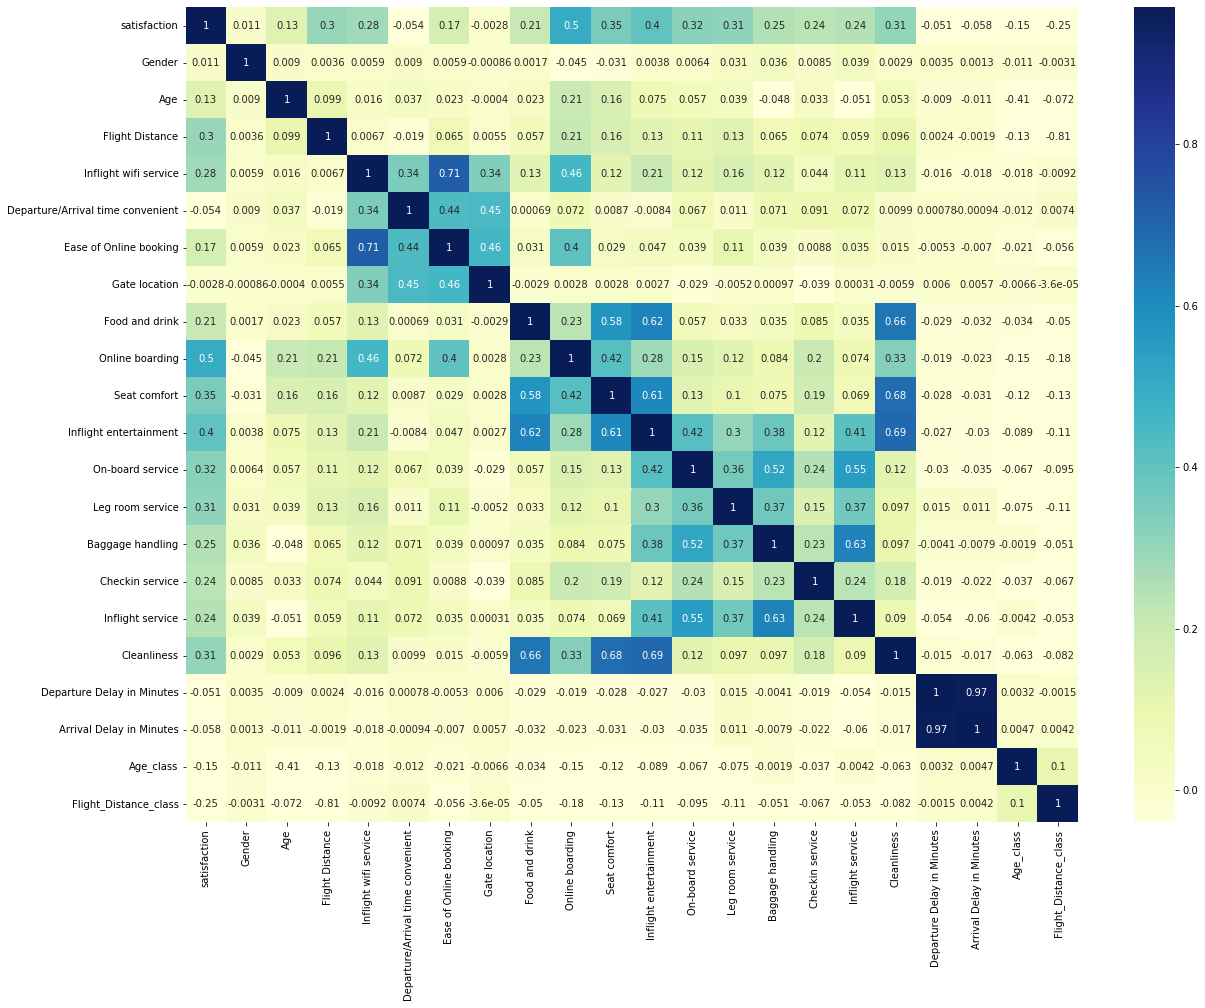

In [39]:
#plotting correlation matrix
corrmatrix = data.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corrmatrix, annot=True,vmin=-.04, vmax=0.97, cmap="YlGnBu")
plt.show()

#### Factors affecting satisfaction most : Online Boarding, Seat Comfort, Inflight Entertainment, Cleanliness, Leg room service, On-board Service, Flight Distance.

#### Factors affecting satisfaction least: Gender, Departure/Arrival Time convenient, Gate Location, Departure/Arrival Delay in minutes. 